In [2]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np 

In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
#useful to know how to handle that
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i in range (len(sequences)):
        for j in range (len(sequences[i])): 
            results[i][sequences[i][j]] = 1. #to be float
    return results

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,))) 
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2022-10-23 19:42:50.878906: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000] 
partial_y_train = y_train[10000:]

In [8]:
model.compile (optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit (partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.4965 - acc: 0.7987 - val_loss: 0.3841 - val_acc: 0.8625
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3005 - acc: 0.9022 - val_loss: 0.3196 - val_acc: 0.8769
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2235 - acc: 0.9289 - val_loss: 0.2893 - val_acc: 0.8856
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1770 - acc: 0.9428 - val_loss: 0.3199 - val_acc: 0.8726
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1455 - acc: 0.9538 - val_loss: 0.2785 - val_acc: 0.8880
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1225 - acc: 0.9627 - val_loss: 0.2954 - val_acc: 0.8821
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0996 - acc: 0.9715 - val_loss: 0.3044 - val_acc: 0.8842
Epoch 8/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0841 - a

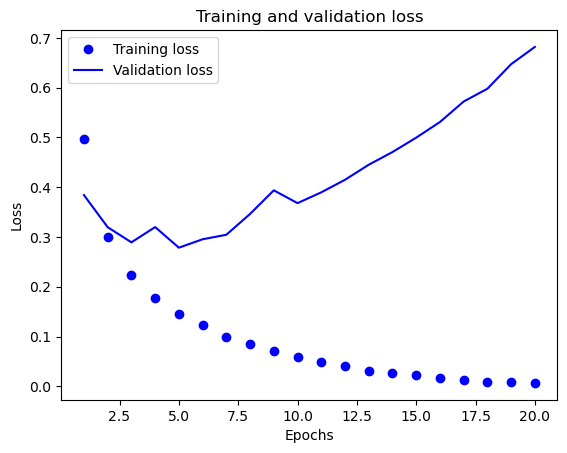

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

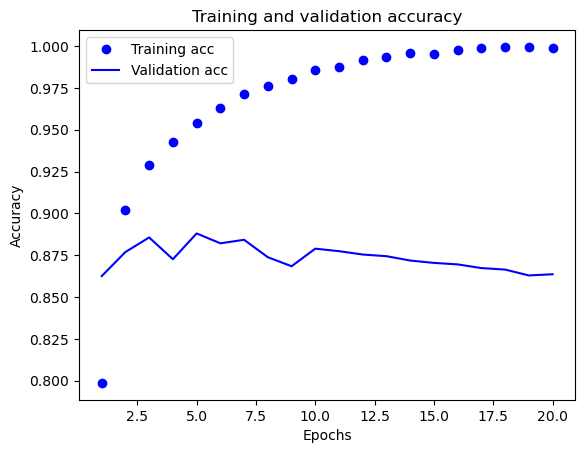

In [10]:
plt.clf() #Clears the figure
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()

In [11]:
#regularization -> on weights
from keras import regularizers

model = Sequential()
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu',input_shape=(10000,)))
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000] 
partial_y_train = y_train[10000:]

model.compile (optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit (partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5917 - acc: 0.7712 - val_loss: 0.4601 - val_acc: 0.8709
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3853 - acc: 0.8937 - val_loss: 0.3710 - val_acc: 0.8811
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3041 - acc: 0.9154 - val_loss: 0.3379 - val_acc: 0.8878
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2621 - acc: 0.9299 - val_loss: 0.3328 - val_acc: 0.8864
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2355 - acc: 0.9405 - val_loss: 0.3476 - val_acc: 0.8789
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2168 - acc: 0.9469 - val_loss: 0.3291 - val_acc: 0.8861
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2038 - acc: 0.9511 - val_loss: 0.3426 - val_acc: 0.8824
Epoch 8/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1929 - a

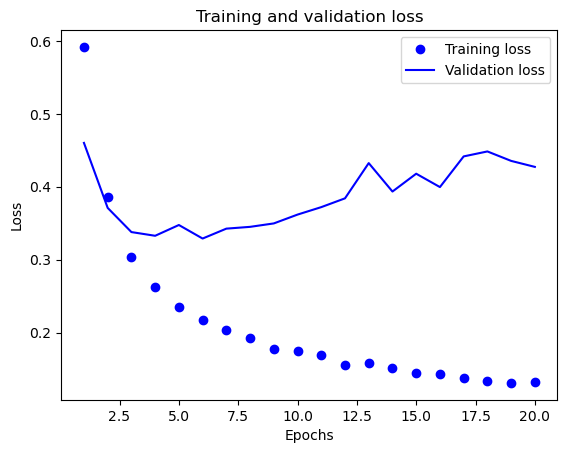

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

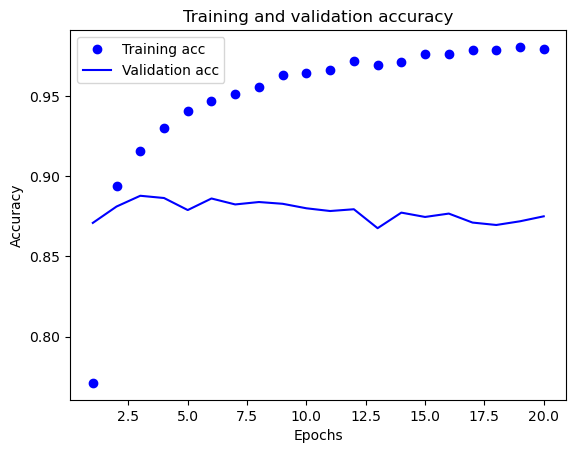

In [13]:
plt.clf() #Clears the figure
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()

In [14]:
from keras.layers import Dropout 

model = Sequential() 
model.add(Dense(16,activation='relu',input_shape=(10000,))) 
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1, activation='sigmoid'))

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000] 
partial_y_train = y_train[10000:]

model.compile (optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit (partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6309 - acc: 0.6369 - val_loss: 0.5100 - val_acc: 0.8483
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5090 - acc: 0.7655 - val_loss: 0.4010 - val_acc: 0.8723
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4201 - acc: 0.8256 - val_loss: 0.3320 - val_acc: 0.8830
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3531 - acc: 0.8655 - val_loss: 0.2933 - val_acc: 0.8876
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3057 - acc: 0.8874 - val_loss: 0.2750 - val_acc: 0.8909
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2643 - acc: 0.9045 - val_loss: 0.2720 - val_acc: 0.8899
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2340 - acc: 0.9185 - val_loss: 0.3004 - val_acc: 0.8813
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2083 - a

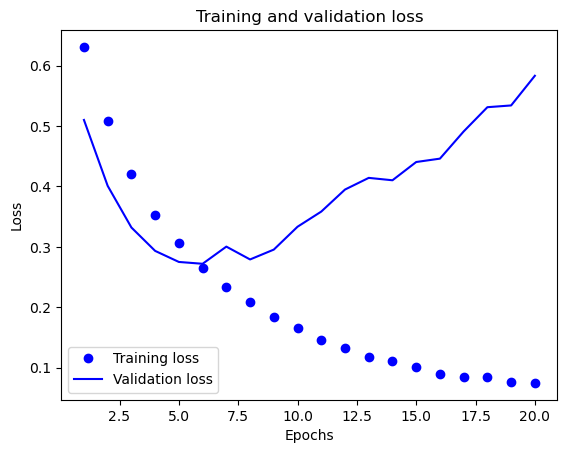

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

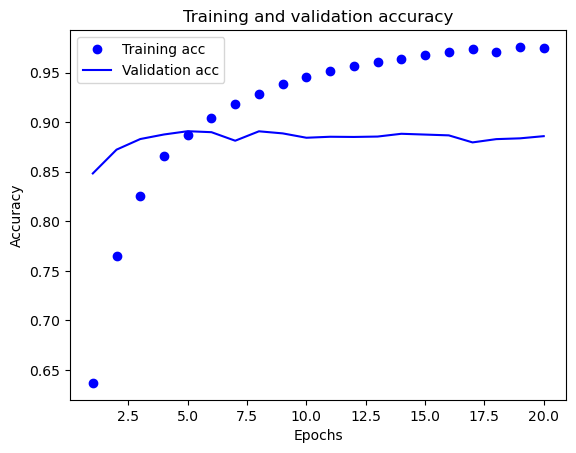

In [16]:
plt.clf() #Clears the figure
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()